# Homework 1: Analytics Base Table Construciton
---
In this homework assignment, you will begin to explore the [SWAN-SF Dataset](https://doi.org/10.7910/DVN/EBCFKM). 


Below you will find a number of steps that you will be required to complete before you can start the assignment.

---

## Step 1: Downloading the Data
---

This assignment will only be using [Partition 1](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBCFKM/BMXYCB), but we will be using more than one by the end of the semster. In later steps, you will need to access the uncompressed files from these partitions, so remember where you put them.

A paper describing the construction of the dataset can be found [here](https://doi.org/10.1038/s41597-020-0548-x).

---

Individual partitions of the dataset can be accessed through following links:
- [Partition 1](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBCFKM/BMXYCB) - 1.2GB
- [Partition 2](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBCFKM/TCRPUD) - 1.4GB
- [Partition 3](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBCFKM/PTPGQT) - 702.1 MB
- [Partition 4](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBCFKM/FIFLFU) - 844.4 MB
- [Partition 5](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBCFKM/QC2C3X) - 1.2 GB

---

### Dataset Attributes:

Each file in the dataset contains the following attributes as a single variate of the multivariate timeseries (MVTS) sample. 

|              |                  |             |
|--------------|------------------|-------------|
| 1. Timestamp | 2. TOTUSJH       | 3. TOTBSQ   |	
| 4. TOTPOT	   | 5. TOTUSJZ       | 6. ABSNJZH  |	
| 7. SAVNCPP   | 8. USFLUX        | 9. TOTFZ	|
| 10. MEANPOT  | 11. EPSZ	      | 12. MEANSHR |
| 13. SHRGT45  | 14. MEANGAM      | 15. MEANGBT |
| 16. MEANGBZ  | 17. MEANGBH      | 18. MEANJZH |
| 19. TOTFY    | 20. MEANJZD      | 21. MEANALP |	
| 22. TOTFX    | 23. EPSY	      | 24. EPSX	|
| 25. R_VALUE  | 26. CRVAL1       | 27. CRLN_OBS|	
| 28. CRLT_OBS | 29. CRVAL2       | 30. HC_ANGLE|	
| 31. SPEI     | 32. LAT_MIN      | 33. LON_MIN |
| 34. LAT_MAX  | 35. LON_MAX      | 36. QUALITY |	
| 37. BFLARE   | 38. BFLARE_LABEL |	39. CFLARE  |	
| 39. CFLARE_LABEL | 40. MFLARE | 41. MFLARE_LABEL |	
| 42. XFLARE | 43. XFLARE_LABEL | 44. BFLARE_LOC |	
| 45. BFLARE_LABEL_LOC | 46. CFLARE_LOC | 47. CFLARE_LABEL_LOC |	
| 48. MFLARE_LOC | 49. MFLARE_LABEL_LOC | 50. FLARE_LOC |	
| 51. XFLARE_LABEL_LOC | 52. XR_MAX | 53. XR_QUAL |	
|54. IS_TMFI | | |

---


## Step 2: Unpacking the data
---

The partitions come in tar.gz archive files. These are easily opened on all current operating systems using the same command in the terminal.

- On Windows 10: Use cmd.exe, then run: tar xf partition1_instances.tar.gz
- On Linux: In the terminal run: tar xf partition1_instances.tar.gz
- On Mac: In the terminal run: tar xf partition1_instances.tar.gz

These all assume you are in the directory that contains the tar.gz file and that you wish to unpack in this same directory.  Search for tar commands if you wish to do something else.

[Instruction Manual for Tar](https://man7.org/linux/man-pages/man1/tar.1.html)

---

## About the data
---

The __partition1__ direcotry contains two subdirectories, __FL__ and __NF__, these subdirectories represent the two classes of our target feature in the solar flare prediction problem we will be attempting to solve this semester. 

- __FL__: Represents the multivariate time series samples that have a Solar Flare occur within 24 hours of the observation.
- __NF__: Represents the multivariate time series samples that do not have a Solar Flare occur within 24 hours of the observation.

The multivariate time series samples are stored in .csv files for each individual sample. Each file name contains a number of pieces of information that we will wish to keep for our prediction task and therefore should be part of your Analytics Base Table. Below are examples of the naming for each sample type.

- __FL__ file name example:`M1.0@265:Primary_ar115_s2010-08-06T06:36:00_e2010-08-06T18:24:00.csv`
- __NF__ file name example:`FQ_ar99_s2010-08-01T19:00:00_e2010-08-02T06:48:00.csv` or `B1.9@909:Primary_ar325_s2011-01-04T02:36:00_e2011-01-04T14:24:00.csv`

Let's look at these formats, starting with those that contain an `@` symbol (we will use the __FL__ file as an example but note that the __NF__ data also has files with this naming):
- __M1.0@265:Primary__: This says that there occurs an M1.0 sized flare within 24 hours of our sample. It also says that this flare is numbered 265 in the accompanying integrated flare dataset that comes as a supplementary file to this dataset. Additionally, "Primary" indicates that the intersection with this active region was verified through the primary method described in the paper.  
- __\_ar115__: This indicates which active region (`_ar`) the sample comes from in the original unsampled dataset.
- __\_s2010-08-06T06:36:00__: This is the start time (`_st`) of the sample.
- __\_e2010-08-06T18:24:00__: This is the end time (`_et`) of the sample.

The files that don't contain the @ symbol begin with FQ and do not have any flare occuring within 24 hours of the sample in the file.  __Note__ that both the __FL__ and __NF__ have files that have flares within 24 hours, but the __NF__ ones are smaller flares that we are considering as unimportant and therefore fall in the non-flaring class.  

---


## Question 1: Reading the flare and non-flare data (25 points)
---

Now that you have an understanding about the data, you will develop a function to read the flaring and non-flaring data and return an object that contains the data from the csv file and some of the information contained in the file name.

Below is the object you will return.

Notice that it takes in several objects: a [string](https://docs.python.org/3/library/string.html), two [datetime](https://docs.python.org/3/library/datetime.html) objects, and a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object.


In [1]:
from pandas import DataFrame
from datetime import datetime

In [2]:
class MVTSSample:
    
    def __init__(self, flare_type:str, start_time:datetime, end_time:datetime, data:DataFrame):
        self._flare_type = flare_type
        self._start_time = start_time
        self._end_time = end_time
        self._data = data
    
    def get_flare_type(self):
        return self._flare_type
    
    def get_start_time(self):
        return self._start_time
    
    def get_end_time(self):
        return self._end_time
    
    def get_data(self):
        return self._data

### About the MVTSSample class
---

The above class represents the data contained in one file. You are to return one of these objects for each call to your method(s). 

- The __flare_type__ is to be one of the following selections (__X__, __M__, __C__, __B__, __FQ__), and these lables will be derived from the information in the file name. The label __FQ__ should be manually created for file names starting with the character `F`.
- __start_time__ is the start time in the file name
- __end_time__ is the end time in the file name
- __data__ is a `Pandas DataFrame` which you will load from the csv using the [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method.  

---

### About your method
---

Your method is to take in the path and name of the file to open, and it is to return one `MVTSSample` for that file.

Below is a definition for that method, use it and write the code to complete the tasks necessary to return the specified information.  You can use a method call in another code block to test that your method works as required.

Some useful methods/functions to use for this question are:

* [String.find](https://www.w3schools.com/python/ref_string_find.asp)

* [datetime.strptime](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior)

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) (__Note:__ the csv files are tab delimited so you will need to use `sep="\t"` to read them properly.)

* [os.path.join](https://docs.python.org/3/library/os.path.html#os.path.join)

In [3]:
import os
import pandas as pd

In [4]:
def read_mvts_instance(data_dir:str, file_name:str) -> MVTSSample:
    # list_file[0]: Mag & num
    # list_file[1]: Primary
    # list_file[2]: ar things
    # list_file[3:6]: startTime
    # list_file[6:]: endTime
    str_type, list_time = tuple(file_name.split("_s"))
    str_start_time, str_end_time = tuple(list_time.split("_e"))
    if str_type[:2] == "FQ": #FQ has two letter thus separate the condition of flare types
        flare_type = "FQ"
    else:
        flare_type = str_type[0]
    
    str_start_time = " ".join(str_start_time.split("T")).replace("_", ":")
    str_end_time = " ".join(str_end_time.strip(".csv").split("T")).replace("_", ":")
    start_time = datetime.strptime(str_start_time,'%Y-%m-%d %H:%M:%S')
    end_time = datetime.strptime(str_end_time, '%Y-%m-%d %H:%M:%S')
    data = pd.read_csv(data_dir + file_name, sep="\t")
    return MVTSSample(flare_type = flare_type, start_time = start_time, end_time = end_time, data = data)
    

In [5]:
data_dir = "C:/Users/Hyunki/anaconda3/envs/csc4780/HW1/partition1/FL/"  # change the path to where your data is stored.
file_name = "M1.0@265_Primary_ar115_s2010-08-06T06_36_00_e2010-08-06T18_24_00.csv"
results = read_mvts_instance(data_dir, file_name)

In [6]:
#Test print
print(results.get_flare_type())
print(results.get_start_time())
print(results.get_end_time())
print(results.get_data())

M
2010-08-06 06:36:00
2010-08-06 18:24:00
              Timestamp      TOTUSJH        TOTBSQ        TOTPOT  \
0   2010-08-06 06:36:00   980.993502  1.551270e+10  2.240189e+23   
1   2010-08-06 06:48:00   987.271725  1.555048e+10  2.252867e+23   
2   2010-08-06 07:00:00   985.015683  1.550109e+10  2.238914e+23   
3   2010-08-06 07:12:00   993.944093  1.554684e+10  2.233768e+23   
4   2010-08-06 07:24:00   994.364606  1.564230e+10  2.242762e+23   
5   2010-08-06 07:36:00   984.920685  1.568060e+10  2.245457e+23   
6   2010-08-06 07:48:00   993.204165  1.571249e+10  2.256520e+23   
7   2010-08-06 08:00:00  1016.056161  1.576882e+10  2.276326e+23   
8   2010-08-06 08:12:00  1011.574889  1.586467e+10  2.285766e+23   
9   2010-08-06 08:24:00  1038.668646  1.590262e+10  2.297426e+23   
10  2010-08-06 08:36:00  1049.760693  1.597122e+10  2.306060e+23   
11  2010-08-06 08:48:00  1064.156152  1.603385e+10  2.322072e+23   
12  2010-08-06 09:00:00  1065.031281  1.607708e+10  2.319878e+23   
13  20

## Question 2: Processing the DataFrame (25 points)
---

Now that you can read individual files to get the multivariate time sries for a sample period, it is time to start building the analytics base table (ABT).

The machine learning methods that we will cover this semster are generally applied to tabular data with a set of descriptive features that are used to learn to classify or predict a target feature. To accomplish this with our raw input multivariate time series, we must produce a set of descriptive features from each of the variates of the the time series.  

In this quesion you will process the DataFrame that was returned from your `read_mvts_instance` method to construct a set of descriptive features for each MVTS sample. 

---

---

### DataFrame Attributes:

Above, you saw the 54 variates of the multivariate timeseries sample in each file. These 54 columns should be present in your dataframe that was returned from your previous `read_mvts_instance` method. For the next question, however, we will only be utilizing a fraction of those. The method description below gives you more information about which ones we will use.

---

### About your method
---
The following will be the variates we will be processing to return features of.

|              |                  |             |
|--------------|------------------|-------------|
| 1. R_VALUE   | 2. TOTUSJH       | 3. TOTBSQ   |	
| 4. TOTPOT	   | 5. TOTUSJZ       | 6. ABSNJZH  |	
| 7. SAVNCPP   | 8. USFLUX        | 9. TOTFZ	|
| 10. MEANPOT  | 11. EPSZ	      | 12. MEANSHR |
| 13. SHRGT45  | 14. MEANGAM      | 15. MEANGBT |
| 16. MEANGBZ  | 17. MEANGBH      | 18. MEANJZH |
| 19. TOTFY    | 20. MEANJZD      | 21. MEANALP |	
| 22. TOTFX    |        	      |         	|

For each of these variates you will calculate two descriptive features: 

- Median 
- Standard Deviation

Note:
* Computing these 2 descriptive features on the 22 variates listed above should yield a dataframe of 44 columns. Make sure your implementation of `calculate_descriptive_features` has all those columns. We will add more later, but for now, this will be sufficient to demonstrate the analytics base table construction process.
* The column names of your new dataframe should have both the variate name and the descriptive feature name (e.g., `TOTPOT_MEDIAN`).

Below is a function defintion, complete it to return the above specified information. You can use a method call in another code block to test that your method works as required.

Some useful methods/functions for this question are:

* [numpy.median](https://numpy.org/doc/stable/reference/generated/numpy.median.html)

* [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

* [pandas.DataFrame.to_numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) (__Note:__ this should be used to get your selected column into a format that the numpy functions above require.)


In [7]:
import numpy as np

In [8]:
def calculate_descriptive_features(data:DataFrame)-> DataFrame:
    variates_to_calc_on = [ 'R_VALUE','TOTUSJH','TOTBSQ','TOTPOT','TOTUSJZ','ABSNJZH','SAVNCPP',
                           'USFLUX','TOTFZ','MEANPOT','EPSZ','MEANSHR','SHRGT45','MEANGAM','MEANGBT',
                           'MEANGBZ','MEANGBH','MEANJZH','TOTFY','MEANJZD','MEANALP','TOTFX']
    features_to_return = [ 'R_VALUE_MEDIAN','R_VALUE_STDDEV',
                          'TOTUSJH_MEDIAN','TOTUSJH_STDDEV',
                          'TOTBSQ_MEDIAN','TOTBSQ_STDDEV',
                          'TOTPOT_MEDIAN','TOTPOT_STDDEV',
                          'TOTUSJZ_MEDIAN','TOTUSJZ_STDDEV',
                          'ABSNJZH_MEDIAN','ABSNJZH_STDDEV',
                          'SAVNCPP_MEDIAN','SAVNCPP_STDDEV',
                          'USFLUX_MEDIAN','USFLUX_STDDEV',
                          'TOTFZ_MEDIAN','TOTFZ_STDDEV',
                          'MEANPOT_MEDIAN','MEANPOT_STDDEV',
                          'EPSZ_MEDIAN','EPSZ_STDDEV',
                          'MEANSHR_MEDIAN','MEANSHR_STDDEV',
                          'SHRGT45_MEDIAN','SHRGT45_STDDEV',
                          'MEANGAM_MEDIAN','MEANGAM_STDDEV',
                          'MEANGBT_MEDIAN','MEANGBT_STDDEV',
                          'MEANGBZ_MEDIAN','MEANGBZ_STDDEV',
                          'MEANGBH_MEDIAN','MEANGBH_STDDEV',
                          'MEANJZH_MEDIAN','MEANJZH_STDDEV',
                          'TOTFY_MEDIAN','TOTFY_STDDEV',
                          'MEANJZD_MEDIAN','MEANJZD_STDDEV',
                          'MEANALP_MEDIAN','MEANALP_STDDEV',
                          'TOTFX_MEDIAN','TOTFX_STDDEV']
    # -----------------------------
    # COMPLETE THE CODE
    # -----------------------------
    
    return_data = pd.DataFrame(index = [0], columns=features_to_return)
    for variate in variates_to_calc_on:
        
        return_data.loc[:, variate + "_MEDIAN"] = np.median(data[variate].to_numpy())#calculate Median
        return_data.loc[:, variate + "_STDDEV"] = np.std(data[variate].to_numpy())#calculate STD
    return return_data
    

In [9]:
#Test
calculate_descriptive_features(data = results.get_data())

,R_VALUE_MEDIAN,R_VALUE_STDDEV,TOTUSJH_MEDIAN,TOTUSJH_STDDEV,TOTBSQ_MEDIAN,TOTBSQ_STDDEV,TOTPOT_MEDIAN,TOTPOT_STDDEV,TOTUSJZ_MEDIAN,TOTUSJZ_STDDEV,...,MEANJZH_MEDIAN,MEANJZH_STDDEV,TOTFY_MEDIAN,TOTFY_STDDEV,MEANJZD_MEDIAN,MEANJZD_STDDEV,MEANALP_MEDIAN,MEANALP_STDDEV,TOTFX_MEDIAN,TOTFX_STDDEV
0,4.20494,0.072957,975.350626,49.523534,1.455873e+10,6.715214e+08,2.227900e+23,5.053744e+21,1.958405e+13,1.613358e+12,...,-0.005317,0.000576,5.478759e+23,5.630232e+22,-0.289832,0.083763,-0.013985,0.00107,2.488827e+24,1.536649e+23


---

## Question 3: Putting the pieces together (25 points)

---

Now that you have the tools to read the data and process descriptive features, it is time to put this all together to produce an analytics base table for all of the data in Partiton 1.

In this question, you shall construct a method that will process a partition by extracting features for each sample in both the __FL__ and __NF__ subdirectories of that partition. The extracted descriptive features (e.g., `TOTPOT_MEDIAN`) are to be placed into your analytics base table DataFrame as colums, with the addition of the `FLARE_TYPE` target feature.

Note:
* Your method should take in the partition location and assume that there will be __FL__ and __NF__ subdirectories to process.

* Remember that your analytics base table should contain 5 flare types (`X`, `M`, `C`, `B`, and `FQ`).

* Your method shall also take in the name of the analytics base table to store. This should be the full name with either an absolute or relative path to store the table also part of the passed in name. 

__Suggestion__: It would be a good idea to debug your function on a much smaller version of one partition (often claled a "pet dataset") and run it on the entire Partition 1 only when you are confident that it is error-free.

Below you will find a method defintion, complete it to perform the above specified information. You can use a method call in another code block to test that your method works as required.


In [10]:
from os import listdir

In [11]:
def process_partition(partition_location:str, abt_name:str):
    abt_header = [ 'FLARE_TYPE', 'R_VALUE_MEDIAN','R_VALUE_STDDEV',
                          'TOTUSJH_MEDIAN','TOTUSJH_STDDEV',
                          'TOTBSQ_MEDIAN','TOTBSQ_STDDEV',
                          'TOTPOT_MEDIAN','TOTPOT_STDDEV',
                          'TOTUSJZ_MEDIAN','TOTUSJZ_STDDEV',
                          'ABSNJZH_MEDIAN','ABSNJZH_STDDEV',
                          'SAVNCPP_MEDIAN','SAVNCPP_STDDEV',
                          'USFLUX_MEDIAN','USFLUX_STDDEV',
                          'TOTFZ_MEDIAN','TOTFZ_STDDEV',
                          'MEANPOT_MEDIAN','MEANPOT_STDDEV',
                          'EPSZ_MEDIAN','EPSZ_STDDEV',
                          'MEANSHR_MEDIAN','MEANSHR_STDDEV',
                          'SHRGT45_MEDIAN','SHRGT45_STDDEV',
                          'MEANGAM_MEDIAN','MEANGAM_STDDEV',
                          'MEANGBT_MEDIAN','MEANGBT_STDDEV',
                          'MEANGBZ_MEDIAN','MEANGBZ_STDDEV',
                          'MEANGBH_MEDIAN','MEANGBH_STDDEV',
                          'MEANJZH_MEDIAN','MEANJZH_STDDEV',
                          'TOTFY_MEDIAN','TOTFY_STDDEV',
                          'MEANJZD_MEDIAN','MEANJZD_STDDEV',
                          'MEANALP_MEDIAN','MEANALP_STDDEV',
                          'TOTFX_MEDIAN','TOTFX_STDDEV']
    
    # -----------------------------
    # COMPLETE THE CODE
    # -----------------------------
    return_data_total = pd.DataFrame()
    #take the sub directory of partition1. added the flare type, and extracting features from both FL and NF
    for sub_directory in listdir(partition_location): #
        for idx, file_name in enumerate(listdir(partition_location + sub_directory)):
            # if idx > 200: break
            results = read_mvts_instance(partition_location + sub_directory + "/", file_name)
            return_data = pd.DataFrame([results.get_flare_type()], columns = ["FLARE_TYPE"])
            return_data = pd.concat([return_data, calculate_descriptive_features(data = results.get_data())], ignore_index=True, axis=1)
            return_data_total = pd.concat([return_data_total, return_data], ignore_index=True)
    return_data_total.columns = abt_header
    return_data_total.to_csv(partition_location + abt_name)
    return return_data_total.describe(include=[object])
    

In [12]:
data_dir = "C:/Users/Hyunki/anaconda3/envs/csc4780/HW1/partition1/"  # change the path to where your data is stored.
abt_name = "partition1_features.csv"
process_partition(data_dir, abt_name)

,FLARE_TYPE
count,73492
unique,5
top,FQ
freq,60130


Using the `pandas.DataFrame.describe` function you check a few things including the total number of samples. Use that to ensure you have processed all MVTS samples of partition 1. 

---

## Question 4: Visualizing the distribution of flares (25 points)
---

How does the distribution of our 5 flare classes look like? This is the question we want to answer using a simple visualization. You can use the [pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function from the [matplotlib](https://matplotlib.org/stable/index.html) library. The x-axis of the plot should represent the flare types and the y-axis should represent the counts of samples.

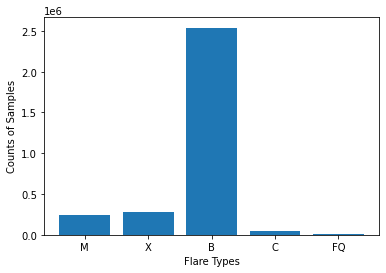

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# -----------------------------
# COMPLETE THE CODE
# -----------------------------

#Show the bar 
df_process_partition = pd.read_csv(data_dir + abt_name)
plt.bar(x=df_process_partition["FLARE_TYPE"].drop_duplicates(), height=df_process_partition.groupby("FLARE_TYPE").count().sum(axis=1))
plt.xlabel('Flare Types')
plt.ylabel('Counts of Samples')
plt.show()